<a href="https://colab.research.google.com/github/gurkiratshergill/PytorchProject/blob/main/PytorchProjectMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [3]:
torch.manual_seed(41)

model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-7-31d2ab34cca2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch:{i} and loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:1.1318050622940063
Epoch:10 and loss:0.9658581614494324
Epoch:20 and loss:0.67915278673172
Epoch:30 and loss:0.40087202191352844
Epoch:40 and loss:0.22570066154003143
Epoch:50 and loss:0.12255845218896866
Epoch:60 and loss:0.07509137690067291
Epoch:70 and loss:0.05467577651143074
Epoch:80 and loss:0.04448390752077103
Epoch:90 and loss:0.038461681455373764


Text(0.5, 0, 'epoch')

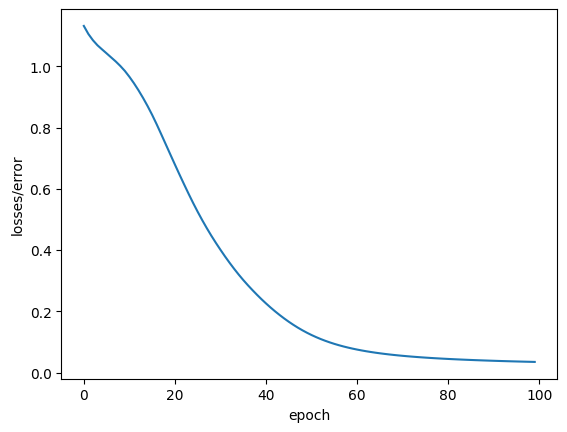

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel("losses/error")
plt.xlabel("epoch")

In [17]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [18]:
loss

tensor(0.1458)

In [21]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == y_val.argmax().item():
      correct+=1

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
print(f'\nCorrect:{correct}')



1.) tensor([-7.7132,  1.5807,  4.8588]) 	 2 	 2
2.) tensor([-10.2249,   0.5155,   8.7638]) 	 2 	 2
3.) tensor([-10.7185,   1.1882,   8.2269]) 	 2 	 2
4.) tensor([-4.4690,  3.5339, -1.1210]) 	 1 	 1
5.) tensor([-9.0873,  1.4669,  6.2793]) 	 2 	 2
6.) tensor([-2.2770,  3.7022, -4.1140]) 	 1 	 1
7.) tensor([-7.0673,  2.2028,  3.2917]) 	 2 	 2
8.) tensor([-4.2226,  3.6468, -1.5420]) 	 1 	 1
9.) tensor([-8.0634,  1.8251,  4.7820]) 	 2 	 2
10.) tensor([-10.8515,   0.5058,   9.3629]) 	 2 	 2
11.) tensor([-6.8611,  2.2126,  3.0811]) 	 2 	 2
12.) tensor([  9.4301,   3.2669, -18.8494]) 	 0 	 0
13.) tensor([  8.5966,   2.9338, -17.1305]) 	 0 	 0
14.) tensor([-1.0571,  3.1664, -4.7063]) 	 1 	 1
15.) tensor([  8.0257,   3.2468, -16.7651]) 	 0 	 0
16.) tensor([-6.7032,  2.4148,  2.6586]) 	 2 	 2
17.) tensor([  8.4607,   3.0915, -17.1118]) 	 0 	 0
18.) tensor([-7.5983,  1.7014,  4.5610]) 	 1 	 2
19.) tensor([  9.0443,   3.1470, -18.0944]) 	 0 	 0
20.) tensor([  7.7209,   2.9005, -15.7171]) 	 0 	 0
21

Testing the model with random data which should come back as setosa/0

In [32]:
new_iris = torch.tensor([5.3,4.2,1.8,0.2])

In [28]:
with torch.no_grad():
  result_val = model(new_iris)
  print(result_val)
  print(new_iris.argmax().item())

tensor([  9.8373,   3.4125, -19.6679])
0


In [29]:
torch.save(model.state_dict(), 'Iris_Classification.pt')

In [30]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Classification.pt'))

<ipython-input-30-64e7ffba908b>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('Iris_Classification.pt'))


<All keys matched successfully>

In [31]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

Double checking that the model loads successfully and have same outputs.

In [33]:
newer_iris = torch.tensor([5.3,4.2,1.8,0.2])
with torch.no_grad():
  result_val = new_model(newer_iris)
  print(result_val)
  print(new_iris.argmax().item())

tensor([  9.8373,   3.4125, -19.6679])
0
